# President Inaugural Text Analysis

My idea for miniproject1 was to do text analysis on US President's inaugural speech transcripts to see what words are commonly used and what words are unique to each president. Due to time, I only was able to look at a couple presidents, but this code could be used to further look at more presidential speeches.

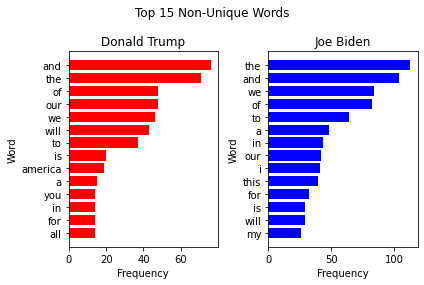

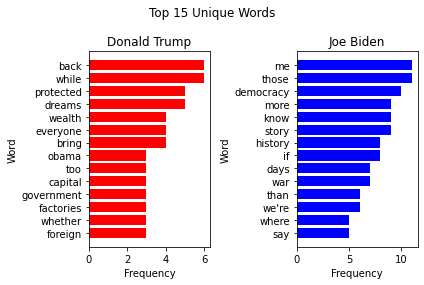

In [10]:
#Jared Staman
import operator
import re
import matplotlib.pyplot as plt

presidents = ['Donald Trump.txt', 'Joe Biden.txt']
speeches = []
list_copy = [[]]

#go through the list of president text files
for i in range(0,2,1):
    f = open(presidents[i], 'r', encoding="ascii", errors='replace')

    t = f.read()
    #cleaning up text
    wds = re.split('\s+', t)
    for k in range(len(wds)):
            wds[k] = re.sub('[,".&|:@,<>()*$?!\\/;=]', "", wds[k])
            wds[k] = re.sub(u'\u201C', "", wds[k])
            wds[k] = re.sub(u'\u201D', "", wds[k])
            wds[k] = re.sub(u'\u2018', "", wds[k])
            wds[k] = re.sub('^[0-9\.]*$', "", wds[k])
            wds[k] = wds[k].lower()

    wf = {}
    for w in wds:
        if w in wf: wf [w] = wf [w] + 1
        else: wf [w] = 1
    wfs = sorted (wf .items(), key = operator .itemgetter (1), reverse=True)
    speeches.append(wfs)
    for j in wfs:
        list_copy[i].append(j[0])
    list_copy.append([])

copy = speeches
copy2 = speeches

#find non-unique words for presidents
non_unique_words = []
for i, wfs in enumerate(speeches):
    non_unique_words.append([])
    ml = 14
    for j in range(0,ml,1):
        non_unique_words[i].append(wfs[j])

#find unique words
for x, word_list in enumerate(copy):
    for s, l in enumerate(list_copy):
        if x != s:    
            word_list = [i for i in word_list if i[0] not in l]
        speeches[x] = word_list
        
        
#printing top 15 unique words for each speech
unique_words = []
for i, wfs in enumerate(speeches):
    unique_words.append([])
    #print("President " + presidents[i].rstrip(".txt"))
    ml = 14
    for j in range(0,ml,1):
        unique_words[i].append(wfs[j])
        #print (wfs[j][0]+"\t"+str(wfs[j][1]))
    #print("\n")

#switch order of lists so the graphs have most common words on top
unique_words[0] = unique_words[0][::-1]
unique_words[1] = unique_words[1][::-1]

non_unique_words[0] = non_unique_words[0][::-1]
non_unique_words[1] = non_unique_words[1][::-1]

#non-unique words graphs
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.barh( [x[0] for x in non_unique_words[0]], [x[1] for x in non_unique_words[0]], color = 'red')
ax2.barh( [x[0] for x in non_unique_words[1]], [x[1] for x in non_unique_words[1]], color = 'blue')
fig.suptitle("Top 15 Non-Unique Words")
ax1.set_title(presidents[0].rstrip(".txt"))
ax2.set_title(presidents[1].rstrip(".txt"))
ax1.set_xlabel("Frequency")
ax1.set_ylabel("Word")
ax2.set_xlabel("Frequency")
ax2.set_ylabel("Word")
fig.tight_layout()
plt.show()


#unique words graphs
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.barh( [x[0] for x in unique_words[0]], [x[1] for x in unique_words[0]], color = 'red')
ax2.barh( [x[0] for x in unique_words[1]], [x[1] for x in unique_words[1]], color = 'blue')
fig.suptitle("Top 15 Unique Words")
ax1.set_title(presidents[0].rstrip(".txt"))
ax2.set_title(presidents[1].rstrip(".txt"))
ax1.set_xlabel("Frequency")
ax1.set_ylabel("Word")
ax2.set_xlabel("Frequency")
ax2.set_ylabel("Word")
fig.tight_layout()
plt.show()

## Results

I looked at the difference in inaugural speeches from Donald Trump and Joe Biden. The non-unique words were mostly the same and it consisted of just commonly used english words such as 'and', 'the', 'of', etc. The unique words were much more interesting and you can tell more about what their speeches were about from reading the unique words.


## Future

Since, I only looked at one speech for each president, the inaugural speech, the number of words analyzed was relatively small (~1000 words). To continue this analysis, I could bring in more speeches from each president. I could also continue looking at more presidents than just Donald Trump and Joe Biden. I think it would be interesting to look at the language used by presidents from past centuries to see how language has evolved. 